# Logistic regression
Created by Quan on 2019/1/7.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
# import seaborn as sns
# sns.lmplot('Exam 1', 'Exam 2', hue='Admitted', data=data, fit_reg=False)
# plt.show()

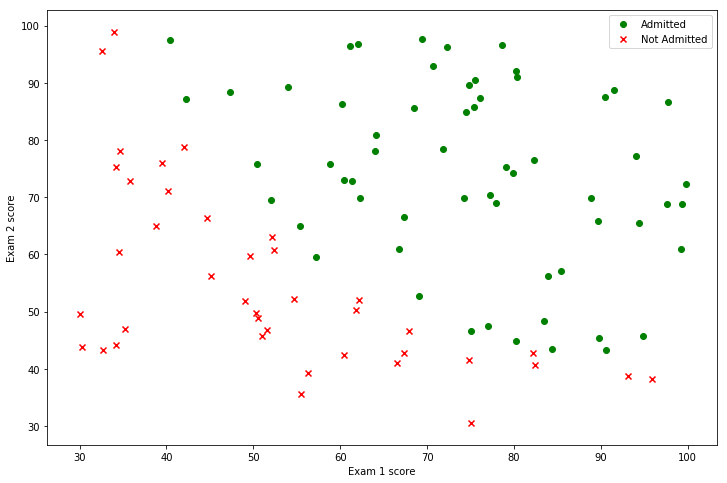

In [5]:
positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], c='g', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()

In [6]:
# 对X特征缩放
mean = data.mean()
std = data.std()
data.iloc[:, :-1] = (data.iloc[:, :-1] - mean) / std
data.head()

,Exam 1,Exam 2,Admitted
0,-1.594216,0.635141,0
1,-1.817101,-1.201489,0
2,-1.531325,0.359483,0
3,-0.280687,1.080923,1
4,0.688062,0.490905,1


In [7]:
data.insert(0, 'One', 1)
data.head()

,One,Exam 1,Exam 2,Admitted
0,1,-1.594216,0.635141,0
1,1,-1.817101,-1.201489,0
2,1,-1.531325,0.359483,0
3,1,-0.280687,1.080923,1
4,1,0.688062,0.490905,1


In [8]:
# make y, theta to be vectors for convenience in using scipy
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
theta = np.zeros(X.shape[1])
X.shape, y.shape, theta.shape

((100, 3), (100,), (3,))

In [9]:
def hypothesis(X, theta):
    h = 1 / (1 + np.exp(-(X @ theta)))
    return h

In [10]:
def compute_cost(theta, X, y):
    m = len(X)
    h = hypothesis(X, theta)
    J = -(1 / m ) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

In [11]:
def gradient(theta, X, y):
    m = len(X)
    g = (hypothesis(X, theta) - y).T @ X / m
    return g

In [12]:
def batch_gradient_descent(X, y, theta, iters=1000, alpha=0.03, show_cost=False):
    costs = []
    
    for i in range(iters):
        theta = theta - alpha * gradient(theta, X, y)
        cost = compute_cost(theta, X, y)
        costs.append(cost)
        
        if show_cost == True and i % 100 == 0:
            print(cost)
            
    return theta, costs

## 普通梯度下降

In [13]:
# iters = 1500
# alpha = 0.1

# theta, costs = batch_gradient_descent(X, y, theta, iters, alpha, show_cost=True)
# theta

## scipy中的高级优化算法

In [14]:
import scipy.optimize as opt

res = opt.minimize(fun=compute_cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
theta = res.x
res.fun, theta

(0.2034977015895807, array([1.71845138, 4.0129073 , 3.74390767]))

In [15]:
def predict(X, theta):
    return np.round(hypothesis(X, theta))

In [16]:
accuracy = 1 - np.mean(np.abs(predict(X, theta) - y), keepdims=True)
print('accuracy: {}%'.format(accuracy.item() * 100))

accuracy: 89.0%


## 寻找决策边界

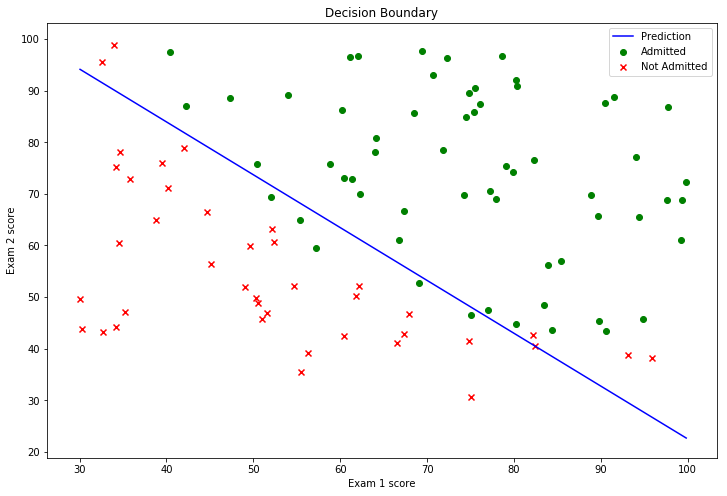

In [17]:
coef = -(theta / theta[2])
_x = np.linspace(X[:, 1].min(), X[:, 1].max())
_y = coef[0] + coef[1] * _x
_x = _x * std[0] + mean[0]
_y = _y * std[1] + mean[1]

ax.plot(_x, _y, c='b', label='Prediction')
ax.legend()
ax.set_title('Decision Boundary')
fig